[View in Colaboratory](https://colab.research.google.com/github/silentvoice/dl-with-keras/blob/master/convnet_filter_visualization.ipynb)

# Convnet Filter Visualization

In [0]:
# this resets the state of the machine (e.g. if you want to re-install from scratch  # this  
# or reset memory usage in this instance)
# wait a minute after running it and then reload the page
#!kill -9 -1

## Check Tensorflow Version

In [0]:
import tensorflow as tf

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
tf.__version__

'1.9.0-rc2'

## Imports

In [0]:
from tensorflow import keras
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras import backend as K
import matplotlib.pyplot as plt
import os, shutil
import numpy as np

## Import VGG16 Model Without The Head

In [6]:
model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

## Create functions to generates an input image which maximizes a particular filter

In [0]:
def process_data_to_img(img_data):
  img_data -= img_data.mean()
  img_data /= (img_data.std() + 1e-5)
  img_data *= 0.1
  img_data += 0.5
  img_data = np.clip(img_data, 0, 1)
  img_data *= 255
  return np.clip(img_data, 0, 255).astype('uint8')

In [0]:
def generate_pattern(layer_name, filter_idx, size=150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_idx])

  grads = K.gradients(loss, model.input)[0]

  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

  iterate = K.function([model.input], [loss, grads])

  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.


  for _ in range(50):
      loss_val, grads_val = iterate([input_img_data])
      input_img_data += grads_val

  img = input_img_data[0]
  return process_data_to_img(img)

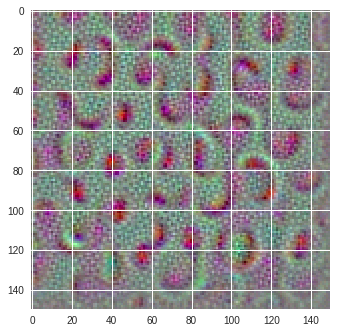

In [28]:
plt.imshow(generate_pattern('block4_conv1', 0))

## Visualize images for some filters for various layers of the model

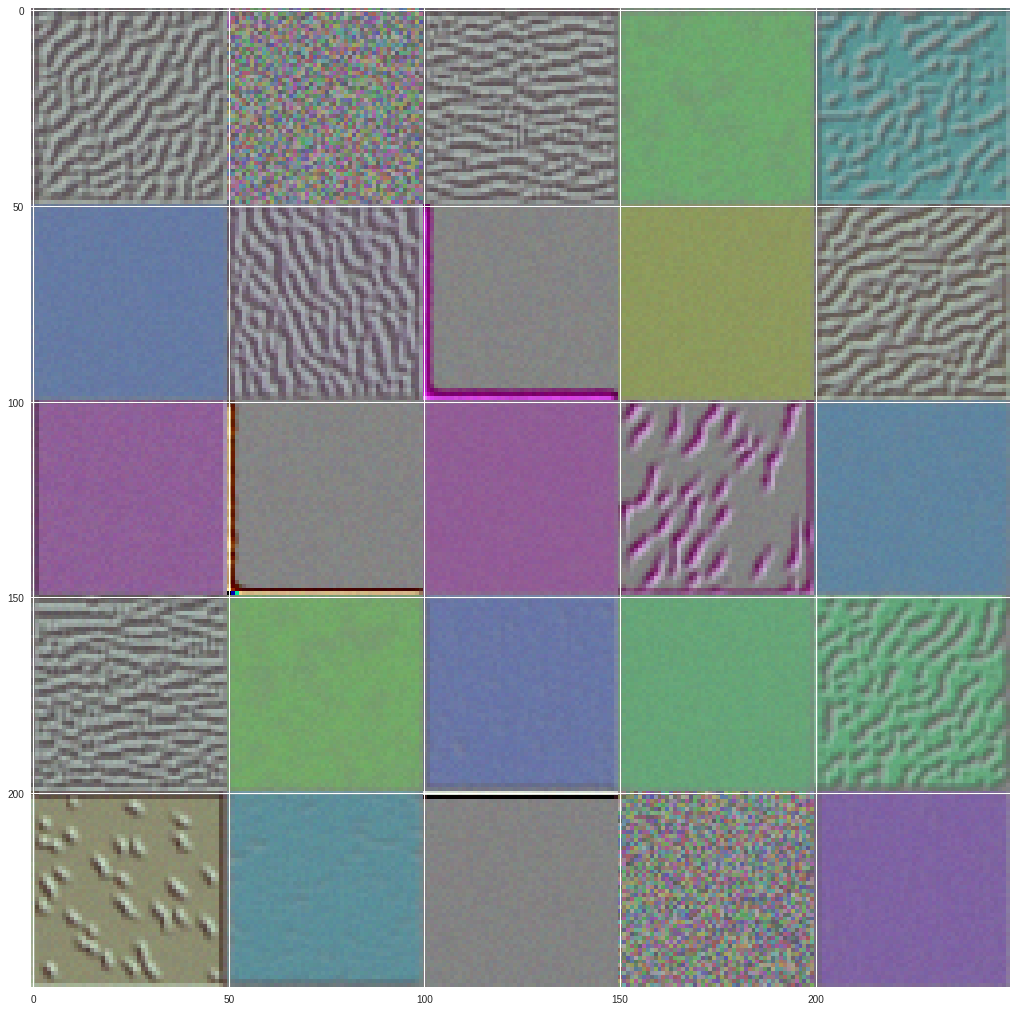

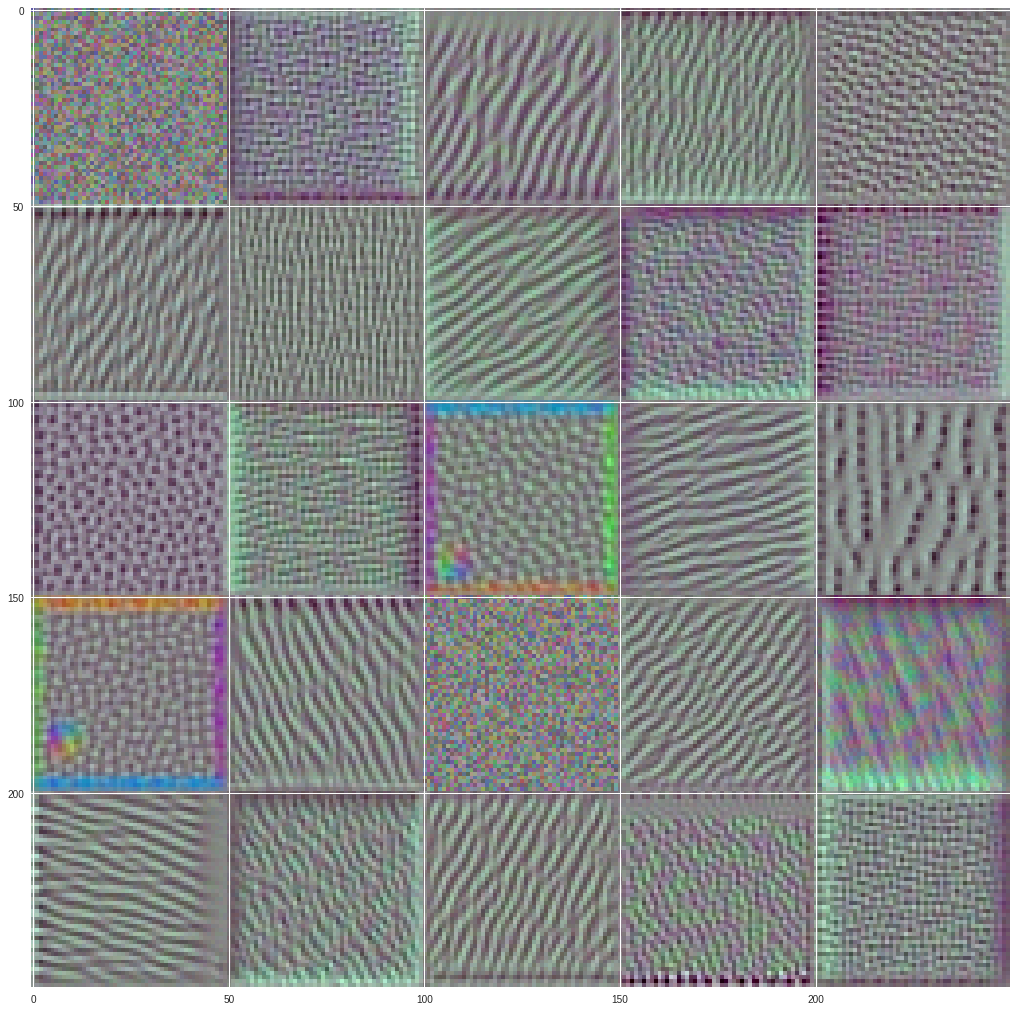

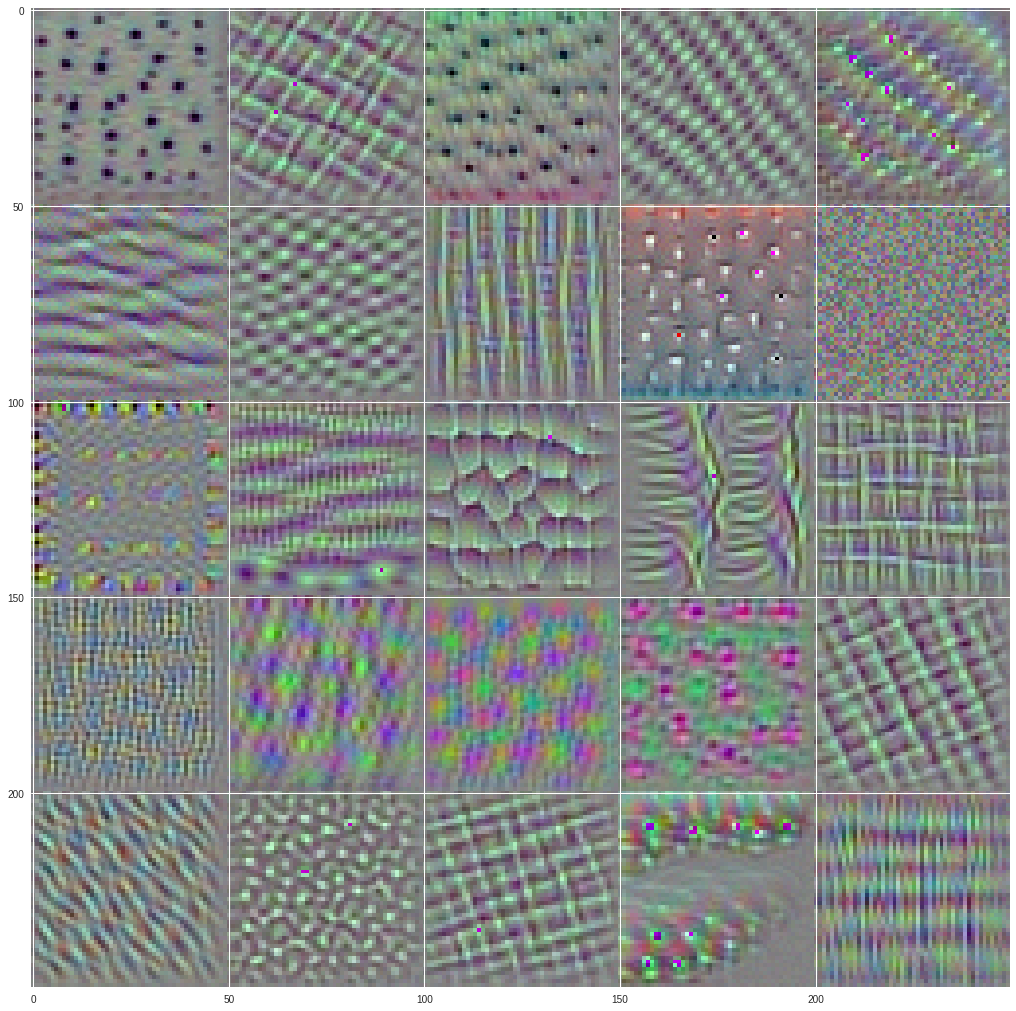

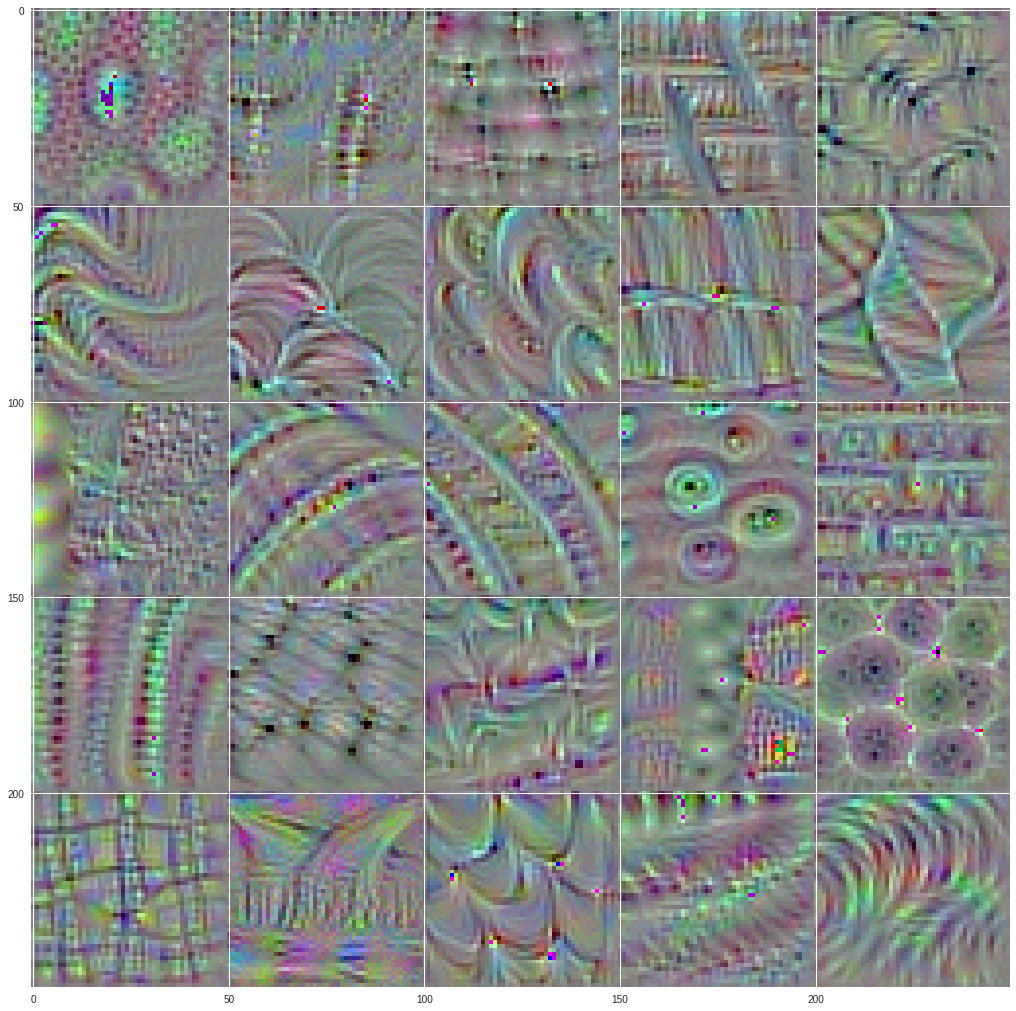

In [32]:
for l_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
  sz = 50
  results = np.zeros((5*sz, 5*sz, 3))
  
  for i in range(5):
    for j in range(5):
      filt_img = generate_pattern(l_name, i + j*5, size=sz)
      
      horiz_start = i * sz
      horiz_end = horiz_start + sz
      vert_start = j * sz
      vert_end = vert_start + sz
      results[horiz_start:horiz_end, vert_start:vert_end, :] = filt_img
   
  plt.figure(figsize=(18, 18))
  plt.imshow(results)